# Gradient Boosting Models
Each new model is trained to minimize the loss function

## Original Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

SEED = 42

df = pd.read_csv('flight_price_processed.csv')

X = df.drop('Price', axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 10)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

test_rmse = mean_squared_error(y_test, y_pred) ** (1 / 2)
print('Root mean Square error: {:.2f}'.format(test_rmse))
print('R2 score: {:.2f}'.format(gbr.score(X_test, y_test)))

Root mean Square error: 7042.71
R2 score: 0.90


**Conclusion:** Not as accurate as Linear Regression or Random Forest

## XGBoost Regressor (More Modern)

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred) ** (1 / 2)
print('Root mean Square error: {:.2f}'.format(xgb_mse))
print('R2 score: {:.2f}'.format(xgb.score(X_test, y_test)))

Root mean Square error: 7042.71
R2 score: 0.97


## Light GBM Regressor (Most Modern)

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED
)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
lgb_mse = mean_squared_error(y_test, y_pred) ** (1 / 2)
print('Root mean Square error: {:.2f}'.format(lgb_mse))
print('R2 score: {:.2f}'.format(lgb.score(X_test, y_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 225114, number of used features: 29
[LightGBM] [Info] Start training from score 20883.980223
Root mean Square error: 7042.71
R2 score: 0.98


**Conclusion:** This model is the most accurate when predicting flight price.

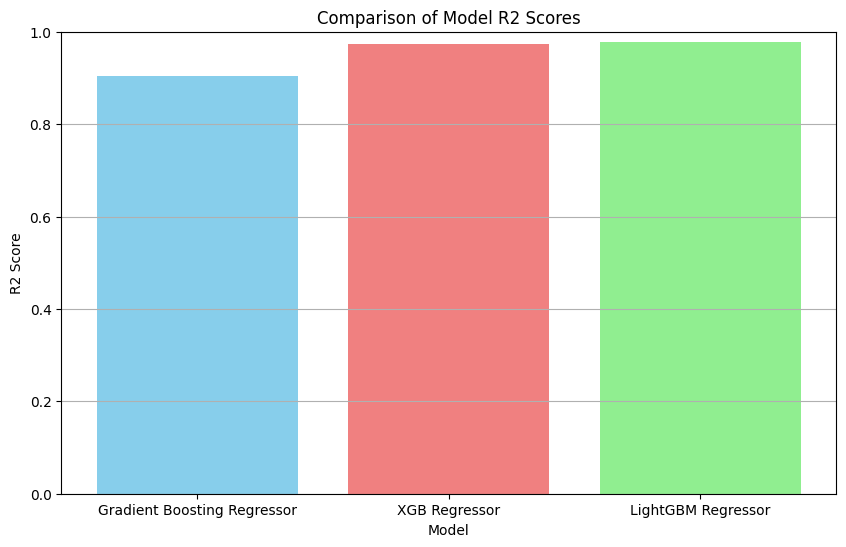

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

r2_gbr = gbr.score(X_test, y_test)
r2_xgb = xgb.score(X_test, y_test)
r2_lgb = lgb.score(X_test, y_test)

model_names = ['Gradient Boosting Regressor', 'XGB Regressor', 'LightGBM Regressor']
r2_scores = [r2_gbr, r2_xgb, r2_lgb]

r2_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores
})

plt.figure(figsize=(10, 6))
plt.bar(r2_df['Model'], r2_df['R2 Score'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparison of Model R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()